<a href="https://colab.research.google.com/github/Kinbloom/Financial-Inclusion-in-East-Africa/blob/master/Financial_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion in East Africa

#### Based on Kenya,Uganda,Tanzania and Rwanda.

**Research Question**

What are the demographic factors to determine whether an individual has or uses a bank account or not? Here we test the variables that are significant either negatively or positively in determining their relationship with the dependent variable (has a bank account or not)

**Metric for success**


*   Determine the factors that determine Financial inclusion in East Africa.
*   Design a model with an 87% accuracy prediction of those with(out) bank accounts.





### Import the necessary libraries.

In [0]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the datasets to be used for the Exploratory Analysis.

In [0]:
#Load the Dataset that describes the dataset.

variableDataset = pd.read_csv('http://bit.ly/VariableDefinitions')
variableDataset


,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [0]:
#Load the Financial Dataset 

FinancialDataset = pd.read_csv('http://bit.ly/FinancialDataset')
FinancialDataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
FinancialDataset.columns = FinancialDataset.columns.str.lower().str.replace(' ', '_')

In [0]:
#Find out the number of entries in each column, column data type

FinancialDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
has_a_bank_account        23488 non-null object
type_of_location          23509 non-null object
cell_phone_access         23513 non-null object
household_size            23496 non-null float64
respondent_age            23490 non-null float64
gender_of_respondent      23490 non-null object
the_relathip_with_head    23520 non-null object
marital_status            23492 non-null object
level_of_educuation       23495 non-null object
type_of_job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
#Find out if there are missing values.

FinancialDataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [0]:
#Drop the rows that contain any form of missing or null value since they may result in inconsistencies.

FinancialDataset.dropna(inplace = True)

In [0]:
#Check to see if there are any null values. 

FinancialDataset.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [0]:
#What unique values are there in each column entry in the dataset?

for i in FinancialDataset.columns:
 print(FinancialDataset[i].unique())
 print ("\n")

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


[2018 2029 2056 2016 2039 2017]


['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']


['Yes' 'No']


['Rural' 'Urban']


['Yes' 'No']


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]


['Female' 'Male']


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


['Secondary education' 'No formal education'
 'V

The year column clearly contains an anomaly since there's the entry of years not included in the study. i.e. 2029,2039,2056.

We must exclude those entries.




In [0]:
FinancialDataset = FinancialDataset[~((FinancialDataset.year == 2029) | (FinancialDataset.year == 2039) | (FinancialDataset.year == 2056 ))]

In [0]:
FinancialDataset.year.unique()

array([2018, 2016, 2017])

The anomaly has been corrected.

In [0]:
FinancialDataset.drop('uniqueid', axis = 1, inplace = True)

In [0]:
FinancialDataset.dtypes

#You need to change the data types to Category and the numerical columns remain as float64.

for column in FinancialDataset[FinancialDataset.columns.difference(['household_size', 'respondent_age'])].columns:
  FinancialDataset[column] = FinancialDataset[column].astype('category')
  
#Check the data types

FinancialDataset.dtypes

country                   category
year                      category
has_a_bank_account        category
type_of_location          category
cell_phone_access         category
household_size             float64
respondent_age             float64
gender_of_respondent      category
the_relathip_with_head    category
marital_status            category
level_of_educuation       category
type_of_job               category
dtype: object

### Univariate Analysis

In [0]:
#Load the first 2 values in the dataset
FinancialDataset.head(2)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [0]:
#Load the last 2 values in the dataset
FinancialDataset.tail(2)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


**Data Description.**

In [0]:
FinancialDataset.describe()

,household_size,respondent_age
count,23340.000000,23340.000000
mean,3.688560,38.807069
std,2.281275,16.519905
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


**Descriptive analysis of the Household Size in the Financial Dataset.**

In [0]:
FinancialDataset['household_size'].skew()

0.9741827150450616

In [0]:
FinancialDataset['household_size'].kurt()

1.1538357462528523

Meaning the kurtosis is leptokurtic, the tail in this distribution is heavy.

Let's plot a boxplot, to gain a visual of the distribution.

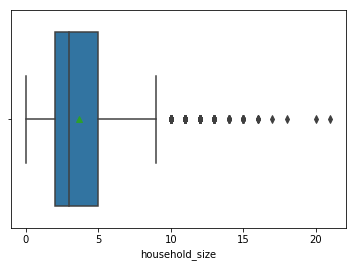

In [0]:
sns.boxplot(FinancialDataset['household_size'],showmeans = True)

There seems to be numerous outliers beyond the threshold. However it would result in an inconclusive outcome if the outliers are actually removed since they can actually viable entries.


**Descriptive Analysis of the Age of Respondent**

In [0]:
FinancialDataset['respondent_age'].skew()

0.8406145812311228

In [0]:
FinancialDataset['respondent_age'].kurt()

0.09826807013177241

Meaning the kurtosis is leptokurtic, the tail in this distribution is heavy.

Let's plot a boxplot, to gain a visual of the distribution.

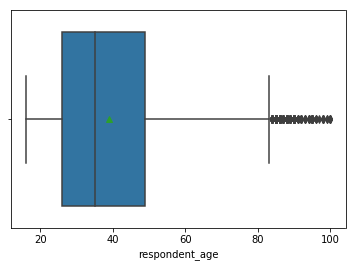

In [0]:
sns.boxplot(FinancialDataset['respondent_age'],showmeans = True)

There seems to be numerous outliers beyond the threshold. However it would result in an inconclusive outcome if the outliers are actually removed since they can actually viable entries.


### Bivariate Analysis


#### **Numerical & Numerical Analysis**

A scatter plot comparing the household size and the age of respondent.

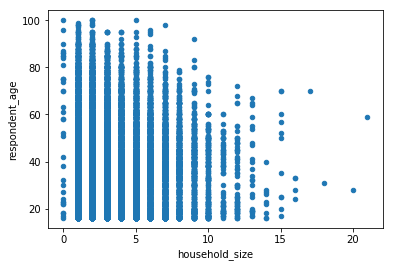

In [0]:
FinancialDataset.plot(x = 'household_size', y = 'respondent_age', kind = 'scatter')

HELP!!!
Comment on the scatter plot?

**Correlation**

In [0]:
coeff = FinancialDataset['household_size'].corr(FinancialDataset['respondent_age'])
print(coeff)

-0.1196711523415487


There seems to be a weak correlation coefficient between the two variables; weak correlation.

### Multivariate Analysis

In [0]:
#Preprocessing
#Dividing my features into the feature set and corresponding labels: X and y respectively.
X = FinancialDataset.drop('has_a_bank_account', axis = 1)
y = FinancialDataset.iloc[:, 2]

In [0]:
#Create Dummy Variables to perform Principal Component Analysis easily and accurately with all the associated variable
X = pd.get_dummies(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [0]:
#Standardisation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
#Training our model and Making predictions using 1 Principal component

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[4740  315]
 [ 450  330]]
0.8688946015424165


In [127]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[4900  155]
 [ 494  286]]
0.8887746358183376


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Principal Component Analysis

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print('The confusion matrix is',confusion_matrix(y_test, y_pred))
print('\n')
print('The accuracy score is',accuracy_score(y_test, y_pred))
print('\n')

#Explained Variance Ratio
print(pca.explained_variance_ratio_)

The confusion matrix is [[4848  133]
 [ 547  307]]


The accuracy score is 0.8834618680377035


[1.20304153e-01 7.66925692e-02 6.87668154e-02 6.41447242e-02
 4.99507679e-02 4.47075936e-02 3.83953470e-02 3.43910377e-02
 3.37717344e-02 3.07972531e-02 2.85239727e-02 2.65350473e-02
 2.56507070e-02 2.42176138e-02 2.38080395e-02 2.36900479e-02
 2.33931736e-02 2.32181251e-02 2.28804149e-02 2.28137840e-02
 2.26343077e-02 2.20861649e-02 2.10700816e-02 2.02883888e-02
 1.93066531e-02 1.83071758e-02 1.47237178e-02 1.37720725e-02
 1.13832091e-02 1.08256617e-02 1.04102973e-02 8.53934872e-03
 2.37258107e-32 4.94853302e-33 3.51598863e-33 2.15119486e-33
 2.02671502e-33 1.98742388e-33 1.36171971e-33 7.17573826e-34
 7.00609228e-34 2.42191569e-34 9.78295036e-35]


In [131]:
len(X.columns)

43

In [132]:
import warnings
warnings.filterwarnings("ignore")

accuracy = []

for i in range(1, 43):

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  from sklearn.decomposition import PCA
  pca = PCA(n_components = i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)

  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression()
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  
  accuracy.append(accuracy_score(y_test, y_pred))

#print(confusion_matrix(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))
#print(pca.explained_variance_ratio_)'''

accuracy



[0.8611825192802056,
 0.8519280205655527,
 0.8683804627249357,
 0.8652956298200514,
 0.8646101113967438,
 0.880719794344473,
 0.8774635818337618,
 0.87146529562982,
 0.8808911739502999,
 0.8796915167095116,
 0.8808911739502999,
 0.8781491002570694,
 0.8755784061696658,
 0.8844901456726649,
 0.875235646958012,
 0.8877463581833762,
 0.8822622107969151,
 0.880719794344473,
 0.8831191088260497,
 0.8814053127677807,
 0.8812339331619538,
 0.8760925449871465,
 0.8766066838046273,
 0.8803770351328192,
 0.8834618680377035,
 0.8827763496143959,
 0.8836332476435305,
 0.8856898029134533,
 0.8819194515852613,
 0.8839760068551842,
 0.8836332476435305,
 0.8894601542416453,
 0.8796915167095116,
 0.8927163667523564,
 0.8875749785775493,
 0.8848329048843188,
 0.8832904884318766,
 0.8867180805484147,
 0.8887746358183376,
 0.8863753213367609,
 0.8812339331619538,
 0.8863753213367609]

In [133]:
X.columns

Index(['household_size', 'respondent_age', 'country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'year_2016', 'year_2017',
       'year_2018', 'type_of_location_Rural', 'type_of_location_Urban',
       'cell_phone_access_No', 'cell_phone_access_Yes',
       'gender_of_respondent_Female', 'gender_of_respondent_Male',
       'the_relathip_with_head_Child',
       'the_relathip_with_head_Head of Household',
       'the_relathip_with_head_Other non-relatives',
       'the_relathip_with_head_Other relative',
       'the_relathip_with_head_Parent', 'the_relathip_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_educuation_6', 'level_of_educuation_No formal education',
       'level_of_educuation_Other/Dont know/RTA',
       'level_of_educuation_Primary education',
       'level_of_educuatio

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 39)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
  
accuracy.append(accuracy_score(y_test, y_pred))




[0.8611825192802056,
 0.8519280205655527,
 0.8683804627249357,
 0.8652956298200514,
 0.8646101113967438,
 0.880719794344473,
 0.8774635818337618,
 0.87146529562982,
 0.8808911739502999,
 0.8796915167095116,
 0.8808911739502999,
 0.8781491002570694,
 0.8755784061696658,
 0.8844901456726649,
 0.875235646958012,
 0.8877463581833762,
 0.8822622107969151,
 0.880719794344473,
 0.8831191088260497,
 0.8814053127677807,
 0.8812339331619538,
 0.8760925449871465,
 0.8766066838046273,
 0.8803770351328192,
 0.8834618680377035,
 0.8827763496143959,
 0.8836332476435305,
 0.8856898029134533,
 0.8819194515852613,
 0.8839760068551842,
 0.8836332476435305,
 0.8894601542416453,
 0.8796915167095116,
 0.8927163667523564,
 0.8875749785775493,
 0.8848329048843188,
 0.8832904884318766,
 0.8867180805484147,
 0.8887746358183376,
 0.8863753213367609,
 0.8812339331619538,
 0.8863753213367609,
 0.8844901456726649,
 0.8844901456726649]

From the analysis above,
the overall objective is to create a model which can highly predict whether an individual has a bank account or not, that is why we compare the accuracies to see which model is more reliable.
